In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as tt

device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')  

In [116]:
#preparing data
data_tt = tt.Compose([
  tt.transforms.ToTensor(),
  tt.transforms.Normalize((0.5), (0.5))
])
root = './'
train = MNIST(root, train=True,  transform=data_tt, download=True)
test  = MNIST(root, train=False, transform=data_tt, download=True)

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [117]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [132]:
w = torch.FloatTensor(28*28, 10).uniform_(-1, 1)/28   #initialize weights with uniform distribution from -1 to 1
w.requires_grad_()    #for autograd

tensor([[-0.0063,  0.0312, -0.0013,  ...,  0.0115, -0.0313,  0.0291],
        [-0.0100, -0.0279, -0.0206,  ..., -0.0009,  0.0015,  0.0115],
        [ 0.0079, -0.0102, -0.0147,  ...,  0.0307,  0.0009,  0.0254],
        ...,
        [ 0.0106,  0.0187, -0.0170,  ..., -0.0310,  0.0330,  0.0160],
        [-0.0336,  0.0017, -0.0051,  ...,  0.0150,  0.0023,  0.0269],
        [ 0.0240,  0.0098, -0.0352,  ...,  0.0231, -0.0071, -0.0294]],
       requires_grad=True)

In [133]:
#SGD learning cycle
EPOCHS = 10
learning_rate = 0.01
losses = []

for epoch in range(EPOCHS):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.reshape(x_batch.shape[0], -1)   # load a batch (reshaped to line)

    #log loss
    logits = x_batch @ w
    probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)   #softmax
    loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()                                                             #WHY IN [] ????????????
    losses.append(loss.item())

    # calc grad
    loss.backward()

    # gradient descent step
    grad = w.grad
    with torch.no_grad():
      w -= learning_rate * grad
    w.grad.zero_()
  print(f'{epoch+1},\t loss: {losses[-1]}')

1,	 loss: 0.19453617930412292
2,	 loss: 0.14034771919250488
3,	 loss: 0.12071729451417923
4,	 loss: 0.110123410820961
5,	 loss: 0.10326223075389862
6,	 loss: 0.09833353012800217
7,	 loss: 0.09455354511737823
8,	 loss: 0.09152326732873917
9,	 loss: 0.08901605010032654
10,	 loss: 0.08689271658658981


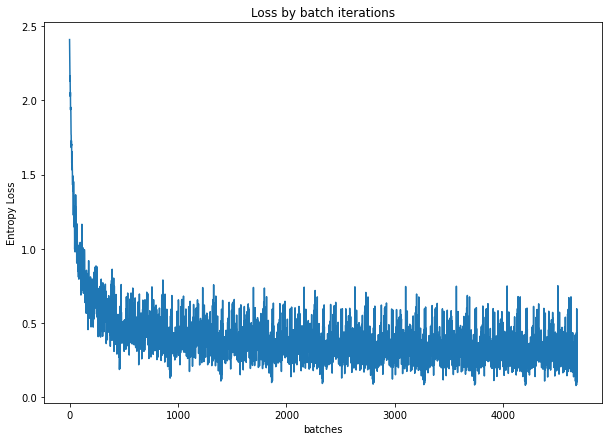

In [134]:
#loss graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

In [135]:
#accuracy score

batches = 0
true_pred = 0

from sklearn.metrics import accuracy_score
for x_batch, y_batch in test_loader:
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1)
  predictions = torch.argmax(x_batch @ w, dim = 1)
  true_pred += (predictions == y_batch).cpu().numpy().mean()
print(true_pred / batches)


0.9121594551282052
